# import packages

In [ ]:
%config IPCompleter.greedy=True

In [52]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler


# import data

In [2]:
# Loading the Iris dataset
X, y = load_iris(return_X_y=True, as_frame=True)

# Some info about the dataset
print(load_iris()["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [3]:
# Describe the features
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Check out the datatypes of the features
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
# Check the values that the output takes
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [6]:
# Select only two classes for binary classification
X_slice = X[50:]  # Iris-Versicolor and Iris-Virginica
y_slice = y[50:] - 1 # Make the classes 0 and 1

print(X_slice.head())
print("--------")
print(y_slice.value_counts())

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
50                7.0               3.2                4.7               1.4
51                6.4               3.2                4.5               1.5
52                6.9               3.1                4.9               1.5
53                5.5               2.3                4.0               1.3
54                6.5               2.8                4.6               1.5
--------
target
0    50
1    50
Name: count, dtype: int64


In [7]:
# collect all the varaiables into a single DataFrame
all_variables = pd.concat([X_slice, y_slice], axis=1) # Concatenate along columns
all_variables.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [8]:
# checking the correlation between features
all_variables.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,0.553855,0.828479,0.593709,0.494305
sepal width (cm),0.553855,1.000000,0.519802,0.566203,0.308080
petal length (cm),0.828479,0.519802,1.000000,0.823348,0.786424
petal width (cm),0.593709,0.566203,0.823348,1.000000,0.828129
target,0.494305,0.308080,0.786424,0.828129,1.000000


<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

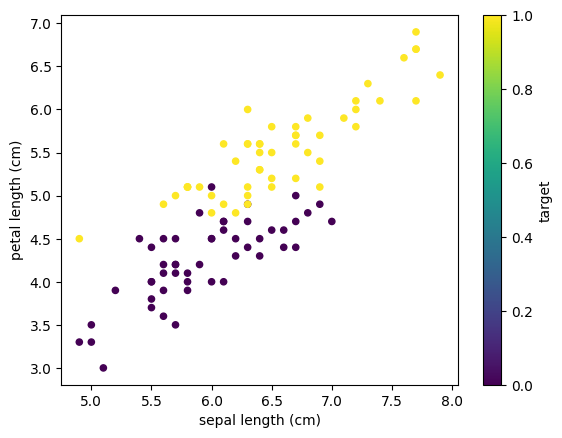

In [15]:
# a small visualization of the correlation matrix
all_variables.plot.scatter(x="sepal length (cm)", y="petal length (cm)", c='target', colormap='viridis')

# Logistic Regression

In [23]:
# Daviding up into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_slice, y_slice, test_size=0.33, random_state=42, stratify=y_slice)

In [25]:
# chacking the shape of the datasets

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (67, 4)
X_test shape: (33, 4)
y_train shape: (67,)
y_test shape: (33,)


In [26]:
# Importing the Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

In [27]:
# Initialize the Logistic Regression instance
log_reg = LogisticRegression()

In [28]:
#Fit the Logistic Regression on the training data
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
# Predict a single new instance
new_flower = [[6.5, 2.8, 7.1, 1.5]]

# Create a DataFrame with the same feature names as training data
new_flower_df = pd.DataFrame(new_flower, columns=X_train.columns)

# Predict numeric label
pred_label = log_reg.predict(new_flower_df)[0]

# Map label to species name (we sliced out setosa, so classes are versicolor and virginica)
iris = load_iris()
species_names = iris['target_names'][1:]  # ['versicolor', 'virginica']
label_to_name = {i: name for i, name in enumerate(species_names)}
pred_name = label_to_name[int(pred_label)]

print('Predicted class index:', pred_label)
print('Predicted species:', pred_name)

Predicted class index: 1
Predicted species: virginica


In [33]:
# Can also predict the probabilities for each class
probabilities = log_reg.predict_proba(new_flower_df)[0]
print('Predicted probabilities:', probabilities)

Predicted probabilities: [0.00759855 0.99240145]


# Evaluating the model: Accuracy Score

We need to evaluate our logistic regression model. The most common way of doing this is with the accuracy score!

In [39]:
# Predict the labels
y_pred = log_reg.predict(X_test)

In [40]:
# Find the accuracy score manually
accuracy = sum(y_pred == y_test) / len(y_test)
print('Accuracy on test set:', accuracy)

Accuracy on test set: 0.9090909090909091


In [43]:
# Use the accuracy score function from sklearn to verify
from sklearn.metrics import accuracy_score

accuracy_sklearn = accuracy_score(y_pred, y_test)
print('Accuracy from sklearn:', accuracy_sklearn)

Accuracy from sklearn: 0.9090909090909091


# Optimal K-value using elbow method

In [ ]:
from sklearn.cluster import KMeans


X = X_slice.iloc[:, [0, 1, 2, 3]].values


sse = [] #sum of squared Error

for k in range(1, 10):
    km = KMeans(n_clusters = k)
    km.fit(X)
    sse.append(km.inertia_) #this function is used to calculate the sum of square error
sse

[139.796,
 63.7046658259773,
 42.07747321428571,
 31.321230158730152,
 26.553424470266574,
 22.57346342984501,
 20.926963203463202,
 19.313919413919415,
 17.388333333333332]

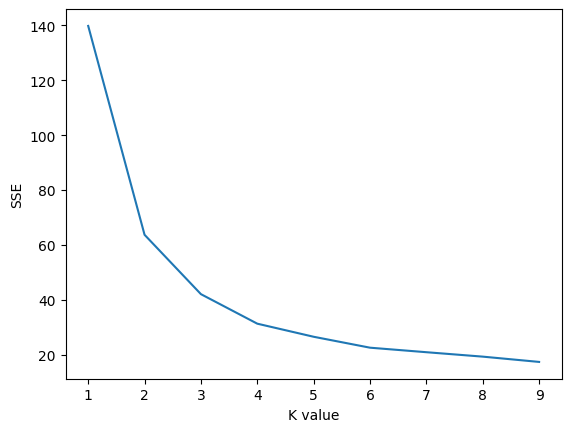

In [53]:
#Now plotting the Optimization value on the graph to check which value is perfect for our classification
plt.xlabel("K value")
plt.ylabel("SSE")
plt.plot(k_range, sse)

# Principal Component Analysis (PCA) on Iris Dataset

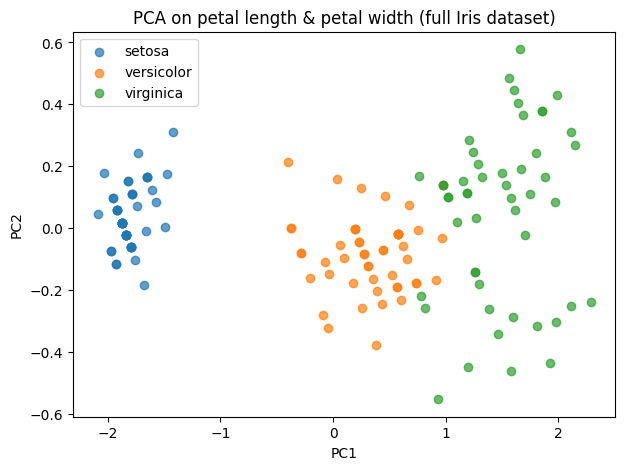

Explained variance ratio (PC1, PC2): [0.98143272 0.01856728]


In [ ]:
# PCA on petal length and petal width using the full iris dataset
from sklearn.decomposition import PCA

# Select petal features from the full dataset
petals_full = X[['petal length (cm)', 'petal width (cm)']].copy()

# Standardize the features
scaler_full = StandardScaler()
petals_scaled_full = scaler_full.fit_transform(petals_full)

# Apply PCA (2 components)
pca_full = PCA(n_components=2)
petals_pca_full = pca_full.fit_transform(petals_scaled_full)

# Build a DataFrame with the principal components and full targets
pca_df_full = pd.DataFrame(petals_pca_full, columns=['PC1', 'PC2'])
pca_df_full['target'] = y.values

# Map numeric labels to species names (all three classes)
iris = load_iris()
label_to_name_full = {i: name for i, name in enumerate(iris['target_names'])}
pca_df_full['species'] = pca_df_full['target'].map(label_to_name_full)

# Scatter plot of the two principal components (full dataset)
fig, ax = plt.subplots(figsize=(7, 5))
for label, group in pca_df_full.groupby('species'):
    ax.scatter(group['PC1'], group['PC2'], label=label, alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA on petal length & petal width (full Iris dataset)')
ax.legend()
plt.show()

# Print explained variance ratio
print('Explained variance ratio (PC1, PC2):', pca_full.explained_variance_ratio_)